# GEOG6592 Lab4

## Task 1

In [65]:
import geopandas as gpd
import folium
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import numpy as numpie


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
housing_shp = gpd.read_file("/content/drive/My Drive/GEOG6592 Lab4/data/california_housing.shp")
housing_shp.head(30)

,total_room,total_bedr,population,households,median_inc,ocean_prox,house_age,median_val,geometry
0,880.0,129.0,322.0,126.0,83252.0,NEAR BAY,41.0,452600.0,POINT (-122.23000 37.88000)
1,7099.0,1106.0,2401.0,1138.0,83014.0,NEAR BAY,21.0,358500.0,POINT (-122.22000 37.86000)
2,1467.0,190.0,496.0,177.0,72574.0,NEAR BAY,52.0,352100.0,POINT (-122.24000 37.85000)
3,1274.0,235.0,558.0,219.0,56431.0,NEAR BAY,52.0,341300.0,POINT (-122.25000 37.85000)
4,1627.0,280.0,565.0,259.0,38462.0,NEAR BAY,52.0,342200.0,POINT (-122.25000 37.85000)
5,919.0,213.0,413.0,193.0,40368.0,NEAR BAY,52.0,269700.0,POINT (-122.25000 37.85000)
6,2535.0,489.0,1094.0,514.0,36591.0,NEAR BAY,52.0,299200.0,POINT (-122.25000 37.84000)
7,3104.0,687.0,1157.0,647.0,31200.0,NEAR BAY,52.0,241400.0,POINT (-122.25000 37.84000)
8,2555.0,665.0,1206.0,595.0,20804.0,NEAR BAY,42.0,226700.0,POINT (-122.26000 37.84000)
9,3549.0,707.0,1551.0,714.0,36912.0,NEAR BAY,52.0,261100.0,POINT (-122.25000 37.84000)


In [13]:
housing_shp_cleaned = housing_shp[housing_shp["house_age"] < 52]
housing_shp_cleaned = housing_shp_cleaned[housing_shp_cleaned["median_val"]<500001.0]

In [14]:
housing_shp_cleaned["ocean_prox"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [15]:
housing_shp_cleaned = pd.get_dummies(housing_shp_cleaned,dtype=int)

In [16]:
housing_shp_cleaned["latitude"] = housing_shp_cleaned["geometry"].y
housing_shp_cleaned["longitude"] = housing_shp_cleaned["geometry"].x

In [17]:
h_data = housing_shp_cleaned.drop("geometry", axis=1)
h_data.head(20)

,total_room,total_bedr,population,households,median_inc,house_age,median_val,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN,latitude,longitude
0,880.0,129.0,322.0,126.0,83252.0,41.0,452600.0,0,0,0,1,0,37.88,-122.23
1,7099.0,1106.0,2401.0,1138.0,83014.0,21.0,358500.0,0,0,0,1,0,37.86,-122.22
8,2555.0,665.0,1206.0,595.0,20804.0,42.0,226700.0,0,0,0,1,0,37.84,-122.26
15,1120.0,283.0,697.0,264.0,21250.0,50.0,140000.0,0,0,0,1,0,37.85,-122.26
18,2239.0,455.0,990.0,419.0,19911.0,50.0,158700.0,0,0,0,1,0,37.84,-122.26
20,751.0,184.0,409.0,166.0,13578.0,40.0,147500.0,0,0,0,1,0,37.85,-122.27
21,1639.0,367.0,929.0,366.0,17135.0,42.0,159800.0,0,0,0,1,0,37.85,-122.27
25,535.0,123.0,317.0,119.0,24038.0,41.0,107500.0,0,0,0,1,0,37.85,-122.28
26,1130.0,244.0,607.0,239.0,24597.0,49.0,93800.0,0,0,0,1,0,37.85,-122.28
28,2082.0,492.0,1131.0,473.0,16424.0,50.0,108900.0,0,0,0,1,0,37.84,-122.28


In [18]:
x = h_data.drop("median_val",axis = 1)
x

,total_room,total_bedr,population,households,median_inc,house_age,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN,latitude,longitude
0,880.0,129.0,322.0,126.0,83252.0,41.0,0,0,0,1,0,37.88,-122.23
1,7099.0,1106.0,2401.0,1138.0,83014.0,21.0,0,0,0,1,0,37.86,-122.22
8,2555.0,665.0,1206.0,595.0,20804.0,42.0,0,0,0,1,0,37.84,-122.26
15,1120.0,283.0,697.0,264.0,21250.0,50.0,0,0,0,1,0,37.85,-122.26
18,2239.0,455.0,990.0,419.0,19911.0,50.0,0,0,0,1,0,37.84,-122.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1665.0,374.0,845.0,330.0,15603.0,25.0,0,1,0,0,0,39.48,-121.09
20636,697.0,150.0,356.0,114.0,25568.0,18.0,0,1,0,0,0,39.49,-121.21
20637,2254.0,485.0,1007.0,433.0,17000.0,17.0,0,1,0,0,0,39.43,-121.22
20638,1860.0,409.0,741.0,349.0,18672.0,18.0,0,1,0,0,0,39.43,-121.32


In [19]:
y = h_data[['median_val']]
y

,median_val
0,452600.0
1,358500.0
8,226700.0
15,140000.0
18,158700.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
columns_to_drop = ['ocean_prox_<1H OCEAN',
       'ocean_prox_INLAND', 'ocean_prox_ISLAND', 'ocean_prox_NEAR BAY',
       'ocean_prox_NEAR OCEAN','latitude','longitude']
x_train_nodummy = x_train.drop(columns=columns_to_drop)
x_test_nodummy = x_test.drop(columns=columns_to_drop)
x_test_nodummy.head(20)

,total_room,total_bedr,population,households,median_inc,house_age
12869,4842.0,935.0,2857.0,907.0,39318.0,7.0
8961,593.0,137.0,371.0,132.0,46932.0,40.0
20309,1612.0,334.0,1431.0,335.0,48125.0,22.0
17392,2121.0,445.0,2211.0,463.0,40603.0,21.0
6961,3531.0,754.0,1613.0,697.0,32359.0,36.0
555,955.0,284.0,585.0,266.0,23882.0,43.0
8347,1722.0,280.0,830.0,261.0,40536.0,36.0
12745,4563.0,1069.0,2256.0,926.0,21472.0,19.0
9670,991.0,277.0,419.0,170.0,35469.0,15.0
11640,3941.0,655.0,1897.0,670.0,48800.0,21.0


In [21]:
training_nodummy_stat = x_train_nodummy.describe().transpose()
training_nodummy_stat

,count,mean,std,min,25%,50%,75%,max
total_room,14857.0,2669.746921,2250.455943,6.0,1454.0,2133.0,3182.0,39320.0
total_bedr,14857.0,542.082183,434.285694,0.0,295.0,437.0,654.0,6445.0
population,14857.0,1470.758767,1181.437978,3.0,811.0,1201.0,1777.0,35682.0
households,14857.0,507.907989,390.900234,2.0,284.0,415.0,613.0,6082.0
median_inc,14857.0,36923.022212,15680.360546,4999.0,25313.0,34706.0,46173.0,150001.0
house_age,14857.0,26.930269,11.439581,1.0,17.0,27.0,36.0,51.0


In [22]:
def standardize_data(data,stats):
    return (data-stats['mean'])/stats['std']

In [23]:
training_data_stded = standardize_data(x_train_nodummy, training_nodummy_stat) ## use the function to standardize both x_train and x_test
test_data_stded = standardize_data(x_test_nodummy, training_nodummy_stat)

In [24]:
training_data_stded[['ocean_prox_<1H OCEAN',
       'ocean_prox_INLAND', 'ocean_prox_ISLAND', 'ocean_prox_NEAR BAY',
       'ocean_prox_NEAR OCEAN']]=x_train[['ocean_prox_<1H OCEAN',
       'ocean_prox_INLAND', 'ocean_prox_ISLAND', 'ocean_prox_NEAR BAY',
       'ocean_prox_NEAR OCEAN']]
training_data_stded

,total_room,total_bedr,population,households,median_inc,house_age,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
10502,-0.205179,-0.018610,-0.040424,-0.066278,-0.064286,-0.518399,1,0,0,0,0
18912,1.842850,1.487311,2.278783,1.604225,0.485064,-1.479973,0,0,0,1,0
20555,0.258282,0.186324,0.194036,0.273963,-0.321933,-1.392557,0,1,0,0,0
13549,-0.708188,-0.596571,-0.590601,-0.726293,-0.677027,0.792838,0,1,0,0,0
8202,0.596880,1.277771,0.699352,1.179564,-0.412619,-0.168736,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
12494,0.250284,0.980732,-0.209709,0.841882,-1.586827,2.016659,0,1,0,0,0
13208,-0.199847,-0.037031,0.161872,-0.091860,-0.612360,0.355759,0,1,0,0,0
6113,-0.685971,-0.520584,-0.551666,-0.503730,-1.398120,-1.917052,1,0,0,0,0
1121,-0.014996,-0.043939,-0.242720,-0.109767,-0.577794,-0.693231,0,1,0,0,0


In [25]:
test_data_stded[['ocean_prox_<1H OCEAN',
       'ocean_prox_INLAND', 'ocean_prox_ISLAND', 'ocean_prox_NEAR BAY',
       'ocean_prox_NEAR OCEAN']]=x_test[['ocean_prox_<1H OCEAN',
       'ocean_prox_INLAND', 'ocean_prox_ISLAND', 'ocean_prox_NEAR BAY',
       'ocean_prox_NEAR OCEAN']]
test_data_stded

,total_room,total_bedr,population,households,median_inc,house_age,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
12869,0.965250,0.904745,1.173351,1.020956,0.152737,-1.742220,0,1,0,0,0
8961,-0.922812,-0.932755,-0.930865,-0.961647,0.638313,1.142501,1,0,0,0,0
20309,-0.470014,-0.479137,-0.033653,-0.442333,0.714395,-0.430983,0,0,0,0,1
17392,-0.243838,-0.223545,0.626560,-0.114884,0.234687,-0.518399,1,0,0,0,0
6961,0.382702,0.487969,0.120397,0.483735,-0.291066,0.792838,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6255,-0.540667,-0.497558,0.117011,-0.483264,0.041771,0.530590,1,0,0,0,0
3759,0.392477,1.192574,1.403579,1.284451,-0.721924,0.443175,1,0,0,0,0
859,0.743073,0.554745,0.593549,0.719089,0.588187,-0.518399,1,0,0,0,0
18315,0.135196,0.186324,-0.030267,0.204891,1.143276,0.530590,0,0,0,1,0


In [26]:
xtrain = training_data_stded.to_numpy()
xtest = test_data_stded.to_numpy()
ytrain = y_train.to_numpy()
ytest = y_test.to_numpy()

In [27]:
xtrain

array([[-0.20517928, -0.01861029, -0.04042427, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.84285015,  1.48731083,  2.27878338, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.25828236,  0.18632393,  0.19403577, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.68597074, -0.520584  , -0.55166566, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01499559, -0.04393924, -0.24272012, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2029575 ,  0.05046866,  0.38024953, ...,  0.        ,
         0.        ,  0.        ]])

### Projection

In [29]:
lo_all = x[['latitude','longitude']]
lo_train = x_train[['latitude','longitude']]
lo_test = x_test[['latitude','longitude']]

In [30]:
import pyproj
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:3310", always_xy=True)
def transform_coords(row):
    x, y = transformer.transform(row['longitude'], row['latitude'])
    return pd.Series([x, y], index=['x', 'y'])

lo_all[['p_lon', 'p_lat']] = lo_all.apply(transform_coords, axis=1)


<ipython-input-30-3072df80204d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_all[['p_lon', 'p_lat']] = lo_all.apply(transform_coords, axis=1)
<ipython-input-30-3072df80204d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_all[['p_lon', 'p_lat']] = lo_all.apply(transform_coords, axis=1)


In [31]:
lo_train[['lon', 'lat']] = lo_train.apply(transform_coords, axis=1)
lo_test[['lon', 'lat']] = lo_test.apply(transform_coords, axis=1)
lo_ptrain = lo_train[['lon', 'lat']]
lo_ptest = lo_test[['lon', 'lat']]
lo_ptrain

<ipython-input-31-851219c91e2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_train[['lon', 'lat']] = lo_train.apply(transform_coords, axis=1)
<ipython-input-31-851219c91e2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_train[['lon', 'lat']] = lo_train.apply(transform_coords, axis=1)
<ipython-input-31-851219c91e2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,lon,lat
10502,213889.774085,-502343.293312
18912,-196031.300449,17171.519248
20555,-156432.964202,74144.703387
13549,248072.622432,-428226.520334
8202,171355.456142,-467786.034668
...,...,...
12494,-127928.485441,62535.719750
13208,210483.643463,-438089.675086
6113,193672.790912,-429601.030820
1121,-135241.073903,198255.506100


In [32]:
loc_train = lo_ptrain.to_numpy()
loc_test = lo_ptest.to_numpy()
loc_train

array([[ 213889.77408533, -502343.29331168],
       [-196031.30044885,   17171.5192483 ],
       [-156432.96420203,   74144.70338741],
       ...,
       [ 193672.79091181, -429601.03082   ],
       [-135241.07390315,  198255.50609983],
       [-166360.28701376,  -75762.35083646]])

In [59]:
loc_train.shape

(14857, 2)

### Compute the Lambda_max

In [34]:
lo_pall = lo_all[['p_lon', 'p_lat']]
min_y = lo_pall['p_lat'].min()
max_y = lo_pall['p_lat'].max()
min_x = lo_pall['p_lon'].min()
max_x = lo_pall['p_lon'].max()


In [35]:
import math

diagonal = math.sqrt((max_x - min_x) ** 2 + (max_y - min_y) ** 2)
print(f"Diagonal of the bounding box is {diagonal:.2f} units.")


Diagonal of the bounding box is 1371909.87 units.


### Import everything from space2vec

In [36]:
%cd /content/drive/My Drive/GEOG6592 Lab4

/content/drive/My Drive/GEOG6592 Lab4


In [37]:
!git clone https://github.com/gengchenmai/space2vec_demo

Cloning into 'space2vec_demo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 0), reused 12 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 11.07 KiB | 1.01 MiB/s, done.


In [38]:
%cd /content/drive/My Drive/GEOG6592 Lab4/space2vec_demo
from space2vec.SpatialRelationEncoder import *
from space2vec.module import *
from space2vec.data_utils import *
from space2vec.utils import *

/content/drive/My Drive/GEOG6592 Lab4/space2vec_demo


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [40]:
params = {
    'spa_enc_type': 'gridcell',
    'spa_embed_dim': 64,
    'extent': (-1, 1, -1, 1),
    'freq': 16,
    'max_radius': 1371909.87,
    'min_radius': 1e-6,
    'spa_f_act': "relu",
    'freq_init': 'geometric',
    'num_hidden_layer': 1,
    'dropout': 0.5,
    'hidden_dim': 512,
    'use_layn': True,
    'skip_connection': True,
    'num_rbf_anchor_pts': 0,
    'rbf_kernal_size': 0,
    'spa_enc_use_postmat': True,
    'device': 'cpu'
}

In [41]:
spa_enc = get_spa_encoder(
                train_locs = [],
                params = params,
                spa_enc_type = params['spa_enc_type'],
                spa_embed_dim = params['spa_embed_dim'],
                extent = params['extent'],
                coord_dim = 2,
                frequency_num = params['freq'],
                max_radius = params['max_radius'],
                min_radius = params['min_radius'],
                f_act = params['spa_f_act'],
                freq_init = params['freq_init'],
                num_rbf_anchor_pts = params['num_rbf_anchor_pts'],
                rbf_kernal_size = params['rbf_kernal_size'],
                use_postmat = params['spa_enc_use_postmat'],
                device = params['device']).to(params['device'])

/content/drive/My Drive/GEOG6592 Lab4/space2vec_demo/space2vec/module.py:96: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.linear.weight)


In [42]:
spa_enc.spa_embed_dim

64

In [43]:
class DNNModel(nn.Module):
  def __init__(self, spa_enc, fea_input_dim, output_dim, hidden_dim1=218, hidden_dim2=64):
    super(DNNModel, self).__init__()
    self.fea_input_dim = fea_input_dim
    self.output_dim = output_dim
    self.hidden_dim1 = hidden_dim1
    self.hidden_dim2 = hidden_dim2
    self.spa_enc = spa_enc
    self.fc1 = nn.Linear(fea_input_dim + spa_enc.spa_embed_dim,hidden_dim1)
    self.fc2 = nn.Linear(hidden_dim1,hidden_dim2)
    self.fc3 = nn.Linear(hidden_dim2,output_dim)



  def forward(self,feats,locs):
    loc_embed = self.spa_enc(locs)
    loc_embed = torch.squeeze(loc_embed, dim=1)
    x = torch.cat([feats, loc_embed], dim=-1)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x





In [60]:
x_con = np.concatenate((xtrain, loc_train), axis=1)
x_con

array([[-2.05179276e-01, -1.86102918e-02, -4.04242692e-02, ...,
         0.00000000e+00,  2.13889774e+05, -5.02343293e+05],
       [ 1.84285015e+00,  1.48731083e+00,  2.27878338e+00, ...,
         0.00000000e+00, -1.96031300e+05,  1.71715192e+04],
       [ 2.58282363e-01,  1.86323928e-01,  1.94035775e-01, ...,
         0.00000000e+00, -1.56432964e+05,  7.41447034e+04],
       ...,
       [-6.85970736e-01, -5.20584000e-01, -5.51665664e-01, ...,
         0.00000000e+00,  1.93672791e+05, -4.29601031e+05],
       [-1.49955927e-02, -4.39392404e-02, -2.42720119e-01, ...,
         0.00000000e+00, -1.35241074e+05,  1.98255506e+05],
       [-2.02957504e-01,  5.04686588e-02,  3.80249528e-01, ...,
         0.00000000e+00, -1.66360287e+05, -7.57623508e+04]])

In [61]:

x_tensor = torch.tensor(x_con, dtype = torch.float32)
#locs_tensor = torch.tensor(loc_train, dtype = torch.float32)
y_train_tensor = torch.tensor(ytrain, dtype = torch.float32)


train_dataset = TensorDataset(x_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=100,shuffle=True)



spa_enc = spa_enc
fea_input_dim = xtrain.shape[1]
output_dim = 1

model = DNNModel(spa_enc=spa_enc, fea_input_dim=fea_input_dim, output_dim=output_dim)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())


In [62]:
model = model.float()
for param in model.parameters():
  param.data = param.data.float()
print(model)

DNNModel(
  (spa_enc): GridCellSpatialRelationEncoder(
    (ffn): MultiLayerFeedForwardNN(
      (layers): ModuleList(
        (0): SingleFeedForwardNN(
          (dropout): Dropout(p=0.5, inplace=False)
          (act): ReLU()
          (layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (linear): Linear(in_features=64, out_features=512, bias=True)
        )
        (1): SingleFeedForwardNN(
          (dropout): Dropout(p=0.5, inplace=False)
          (act): ReLU()
          (linear): Linear(in_features=512, out_features=64, bias=True)
        )
      )
    )
  )
  (fc1): Linear(in_features=75, out_features=218, bias=True)
  (fc2): Linear(in_features=218, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


## task 2

In [ ]:

for epoch in range(10):
    for xcon, targets in train_loader:
        optimizer.zero_grad()
        coors = numpie.expand_dims(xcon[:,11:13], axis=1)
        outputs = model(xcon[:,0:11], coors)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch}, Loss: {loss.item()}")


In [68]:
x_tcon = np.concatenate((xtest, loc_test), axis=1)

x_ttensor = torch.tensor(x_tcon, dtype = torch.float32)
y_test_tensor = torch.tensor(ytest, dtype = torch.float32)


test_dataset = TensorDataset(x_ttensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=100,shuffle=True)

In [69]:
for epoch in range(100):
    for xcon, targets in train_loader:
        optimizer.zero_grad()
        coors = np.expand_dims(xcon[:, 11:13], axis=1)
        outputs = model(xcon[:, 0:11], coors)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()


    print(f"Epoch {epoch}, Loss: {loss.item()}")


    if (epoch + 1) % 5 == 0:
        model.eval()
        test_loss = 0
        with torch.no_grad():
            for xcon_test, targets_test in test_loader:
                coors_test = np.expand_dims(xcon_test[:, 11:13], axis=1)
                outputs_test = model(xcon_test[:, 0:11], coors_test)
                test_loss += criterion(outputs_test, targets_test).item()

        test_loss /= len(test_loader)
        print(f"Epoch {epoch}, Test Loss: {test_loss}")
        model.train()

Epoch 0, Loss: 2378002176.0
Epoch 1, Loss: 1927678976.0
Epoch 2, Loss: 1176461824.0
Epoch 3, Loss: 2958615552.0
Epoch 4, Loss: 2117131520.0
Epoch 4, Test Loss: 4214536205.4736843
Epoch 5, Loss: 4062080000.0
Epoch 6, Loss: 4072214784.0
Epoch 7, Loss: 2557048064.0
Epoch 8, Loss: 3109114112.0
Epoch 9, Loss: 3762179072.0
Epoch 9, Test Loss: 7930043095.578947
Epoch 10, Loss: 3213403136.0
Epoch 11, Loss: 2146125312.0
Epoch 12, Loss: 2998745600.0
Epoch 13, Loss: 3107527680.0
Epoch 14, Loss: 3174930688.0
Epoch 14, Test Loss: 6880468385.684211
Epoch 15, Loss: 4399919104.0
Epoch 16, Loss: 3194703616.0
Epoch 17, Loss: 4150535936.0
Epoch 18, Loss: 2483307264.0
Epoch 19, Loss: 2652284160.0
Epoch 19, Test Loss: 6517298068.210526
Epoch 20, Loss: 2631235328.0
Epoch 21, Loss: 3245910016.0
Epoch 22, Loss: 2922739456.0
Epoch 23, Loss: 3434784512.0
Epoch 24, Loss: 3407834112.0
Epoch 24, Test Loss: 6551080380.631579
Epoch 25, Loss: 2765144320.0
Epoch 26, Loss: 1856672256.0
Epoch 27, Loss: 2574008576.0
Epoc

## Task3

In [70]:
pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 12.3 MB/s eta 0:00:00


In [72]:
import optuna
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [74]:
def objective(trial):
    learning_rate = trial.suggest_categorical('learning_rate', [0.1, 0.001, 0.0001])
    spa_embed_dim = trial.suggest_categorical('spa_embed_dim', [16, 32, 64])
    freq = trial.suggest_categorical('freq', [16, 32])
    min_radius = trial.suggest_categorical('min_radius', [1e-5, 1e-3, 1e-1, 1, 10, 100])
    num_hidden_layers = trial.suggest_categorical('num_hidden_layers', [1, 2, 3])
    hidden_dim = trial.suggest_categorical('hidden_dim', [64, 128, 256])


    spa_enc = get_spa_encoder(
        train_locs=[],
        params=params,
        spa_enc_type='gridcell',
        spa_embed_dim=spa_embed_dim,
        extent=(-1, 1, -1, 1),
        coord_dim=2,
        frequency_num=freq,
        max_radius=params['max_radius'],
        min_radius=min_radius,
        f_act=params['spa_f_act'],
        freq_init=params['freq_init'],
        num_rbf_anchor_pts=params['num_rbf_anchor_pts'],
        rbf_kernal_size=params['rbf_kernal_size'],
        use_postmat=params['spa_enc_use_postmat'],
        device='cpu'
    ).to('cpu')

    model = DNNModel(spa_enc=spa_enc, fea_input_dim=fea_input_dim, output_dim=output_dim, hidden_dim1=hidden_dim).to('cpu')

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    for epoch in range(10):
        for feats, targets in DataLoader(train_dataset, batch_size=100, shuffle=True):
            model.train()
            optimizer.zero_grad()
            coors = np.expand_dims(feats[:, 11:13], axis=1)
            outputs = model(feats[:, :11], coors)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()


    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for feats, targets in DataLoader(test_dataset, batch_size=100):
            coors = np.expand_dims(feats[:, 11:13], axis=1)
            outputs = model(feats[:, :11], coors)
            validation_loss += criterion(outputs, targets).item()

    validation_loss /= len(test_dataset)
    return validation_loss


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)


best_params = study.best_params
print("Best parameters:", best_params)




[I 2024-05-06 23:03:05,432] A new study created in memory with name: no-name-0c4c7a51-6958-4edb-ae72-5c487fc67b9c
/content/drive/My Drive/GEOG6592 Lab4/space2vec_demo/space2vec/module.py:96: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.linear.weight)
[I 2024-05-06 23:03:15,499] Trial 0 finished with value: 50951330.55827726 and parameters: {'learning_rate': 0.1, 'spa_embed_dim': 32, 'freq': 32, 'min_radius': 10, 'num_hidden_layers': 3, 'hidden_dim': 256}. Best is trial 0 with value: 50951330.55827726.
[I 2024-05-06 23:03:22,397] Trial 1 finished with value: 100934786.92866756 and parameters: {'learning_rate': 0.0001, 'spa_embed_dim': 16, 'freq': 16, 'min_radius': 10, 'num_hidden_layers': 3, 'hidden_dim': 64}. Best is trial 0 with value: 50951330.55827726.
[I 2024-05-06 23:03:32,249] Trial 2 finished with value: 111268433.7270525 and parameters: {'learning_rate': 0.0001, 'spa_embed_dim': 32, 'freq': 32, 'min_rad

Best parameters: {'learning_rate': 0.1, 'spa_embed_dim': 16, 'freq': 16, 'min_radius': 1e-05, 'num_hidden_layers': 1, 'hidden_dim': 128}


## Task 4

In [76]:
params['spa_embed_dim'] = best_params['spa_embed_dim']
params['freq'] = best_params['freq']
params['min_radius'] = best_params['min_radius']


spa_enc = get_spa_encoder(
    train_locs=[],
    params=params,
    spa_enc_type='gridcell',
    spa_embed_dim=params['spa_embed_dim'],
    extent=(-1, 1, -1, 1),
    coord_dim=2,
    frequency_num=params['freq'],
    max_radius=params['max_radius'],
    min_radius=params['min_radius'],
    f_act=params['spa_f_act'],
    freq_init=params['freq_init'],
    num_rbf_anchor_pts=params['num_rbf_anchor_pts'],
    rbf_kernal_size=params['rbf_kernal_size'],
    use_postmat=params['spa_enc_use_postmat'],
    device='cpu'
).to('cpu')

class DNNModel(nn.Module):
  def __init__(self, spa_enc, fea_input_dim, output_dim, hidden_dim=128):
    super(DNNModel, self).__init__()
    self.fea_input_dim = fea_input_dim
    self.output_dim = output_dim
    self.hidden_dim = hidden_dim

    self.spa_enc = spa_enc
    self.fc1 = nn.Linear(fea_input_dim + spa_enc.spa_embed_dim,hidden_dim)
    self.fc2 = nn.Linear(hidden_dim,output_dim)




  def forward(self,feats,locs):
    loc_embed = self.spa_enc(locs)
    loc_embed = torch.squeeze(loc_embed, dim=1)
    x = torch.cat([feats, loc_embed], dim=-1)
    x = torch.relu(self.fc1(x))

    x = self.fc2(x)
    return x


spa_enc = spa_enc
fea_input_dim = xtrain.shape[1]
output_dim = 1

model = DNNModel(spa_enc=spa_enc, fea_input_dim=fea_input_dim, output_dim=output_dim)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=best_params['learning_rate'])






/content/drive/My Drive/GEOG6592 Lab4/space2vec_demo/space2vec/module.py:96: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(self.linear.weight)


In [77]:
model = model.float()
for param in model.parameters():
  param.data = param.data.float()
print(model)

DNNModel(
  (spa_enc): GridCellSpatialRelationEncoder(
    (ffn): MultiLayerFeedForwardNN(
      (layers): ModuleList(
        (0): SingleFeedForwardNN(
          (dropout): Dropout(p=0.5, inplace=False)
          (act): ReLU()
          (layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (linear): Linear(in_features=64, out_features=512, bias=True)
        )
        (1): SingleFeedForwardNN(
          (dropout): Dropout(p=0.5, inplace=False)
          (act): ReLU()
          (linear): Linear(in_features=512, out_features=16, bias=True)
        )
      )
    )
  )
  (fc1): Linear(in_features=27, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [78]:
import matplotlib.pyplot as plt
all_preds = []
all_targets = []

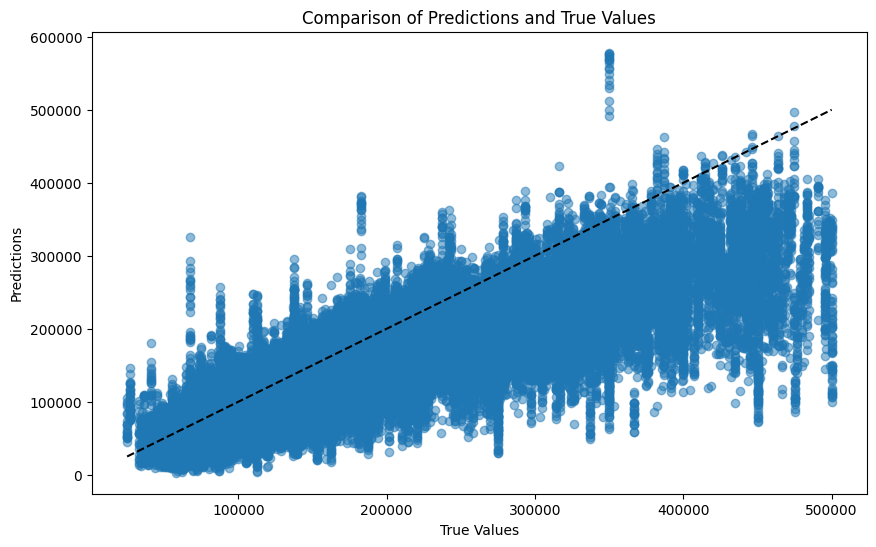

In [79]:

for epoch in range(100):
    for xcon, targets in train_loader:
        optimizer.zero_grad()
        coors = np.expand_dims(xcon[:, 11:13], axis=1)
        outputs = model(xcon[:, 0:11], coors)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 5 == 0:
        model.eval()
        with torch.no_grad():
            for xcon_test, targets_test in test_loader:
                coors_test = np.expand_dims(xcon_test[:, 11:13], axis=1)
                outputs_test = model(xcon_test[:, 0:11], coors_test)
                all_preds.append(outputs_test.numpy())
                all_targets.append(targets_test.numpy())
        model.train()

# Convert lists to numpy arrays for easier handling
all_preds = np.concatenate(all_preds, axis=0).flatten()  # Adjust shape as necessary
all_targets = np.concatenate(all_targets, axis=0).flatten()  # Adjust shape as necessary

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(all_targets, all_preds, alpha=0.5)
plt.title('Comparison of Predictions and True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([all_targets.min(), all_targets.max()], [all_targets.min(), all_targets.max()], 'k--')  # Diagonal line for reference
plt.show()